In [1]:
import pandas  as pd
import seaborn as sns
import plotly.express    as px
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

Let's start by reading and inspecting the data file.

In [2]:
# Read and inspect data
raw_data = pd.read_csv('C:/Users/SMARTech/Downloads/violenceFemmes_pays/makeovermonday-2020w10/violence_data.csv')
raw_data.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [3]:
print('Dataset contains data from {} countries'.format(raw_data.Country.nunique()))

Dataset contains data from 70 countries


The data was originally provided in the `long` format, we can convert it by using `pivot_table`.
Lets do this and inspect the contents.

In [4]:
raw_survey_df = raw_data.pivot_table(index=['Country','Gender','Demographics Question','Demographics Response'],columns=['Question'], values=['Value'])
raw_survey_df

Value  \
Question                                                              ... for at least one specific reason   
Country     Gender Demographics Question Demographics Response                                               
Afghanistan F      Age                   15-24                                                        80.1   
                                         25-34                                                        81.5   
                                         35-49                                                        79.0   
                   Education             Higher                                                       61.1   
                                         No education                                                 81.0   
...                                                                                                    ...   
Zimbabwe    M      Marital status        Married or living together                                   24.6   
                                         Never married                                                42.4   
                                         Widowed, divorced, separated                                 28.8   
                   Residence             Rural                                                        37.2   
                                         Urban                                                        25.0   

                                                                                                  \
Question                                                              ... if she argues with him   
Country     Gender Demographics Question Demographics Response                                     
Afghanistan F      Age                   15-24                                              57.5   
                                         25-34                                              60.0   
                                         35-49                                              59.8   
                   Education             Higher                                             37.7   
                                         No education                                       60.2   
...                                                                                          ...   
Zimbabwe    M      Marital status        Married or living together                         10.2   
                                         Never married                                      18.2   
                                         Widowed, divorced, separated                       12.4   
                   Residence             Rural                                              16.8   
                                         Urban                                               8.8   

                                                                                                 \
Question                                                              ... if she burns the food   
Country     Gender Demographics Question Demographics Response                                    
Afghanistan F      Age                   15-24                                             17.3   
                                         25-34                                             18.2   
                                         35-49                                             18.8   
                   Education             Higher                                            10.1   
                                         No education                                      19.1   
...                                                                                         ...   
Zimbabwe    M      Marital status        Married or living together                         3.1   
                                         Never married                                      9.3   
                                         Widowed, divorced, separated 

Its still a bit chunky, and we can improve by unnesting the indexes and changing the column names.

In [5]:
# Reset columns
survey_df = raw_survey_df.T.reset_index(drop=True).T.reset_index()

# Rename columns
survey_df.columns = ['country',
                     'gender',
                     'demographics_question',
                     'demographics_response',
                     'violence_any_reason',
                     'violence_argue',
                     'violence_food',
                     'violence_goingout',
                     'violence_neglect',
                     'violence_sex',
                    ]

In [6]:
survey_df

,country,gender,demographics_question,demographics_response,violence_any_reason,violence_argue,violence_food,violence_goingout,violence_neglect,violence_sex
0,Afghanistan,F,Age,15-24,80.1,57.5,17.3,67.7,46.5,32.1
1,Afghanistan,F,Age,25-34,81.5,60.0,18.2,68.5,50.2,34.3
2,Afghanistan,F,Age,35-49,79.0,59.8,18.8,64.7,48.1,33.5
3,Afghanistan,F,Education,Higher,61.1,37.7,10.1,41.1,33.4,10.8
4,Afghanistan,F,Education,No education,81.0,60.2,19.1,68.4,48.9,34.2
...,...,...,...,...,...,...,...,...,...,...
1884,Zimbabwe,M,Marital status,Married or living together,24.6,10.2,3.1,14.2,13.8,4.4
1885,Zimbabwe,M,Marital status,Never married,42.4,18.2,9.3,21.8,23.2,7.8
1886,Zimbabwe,M,Marital status,"Widowed, divorced, separated",28.8,12.4,3.3,16.3,18.3,4.7
1887,Zimbabwe,M,Residence,Rural,37.2,16.8,7.9,21.0,20.1,7.2


Note that the columns relate to questions where the respondents were asked if they agreed with the following statements:

- A husband is justified in hitting or beating his wife for at least one specific reason?
- A husband is justified in hitting or beating his wife if she argues with him?
- A husband is justified in hitting or beating his wife if she burns the food?
- A husband is justified in hitting or beating his wife if she goes out without telling him?
- A husband is justified in hitting or beating his wife if she neglects the children?
- A husband is justified in hitting or beating his wife if she refuses to have sex with him?

# Exploratory Data Analysis

That's a lot better, now lets query results in order to make an exploratory data analysis acording to `Age` and `Education`.

In [7]:
# Examine Violence x gender
fig = px.box(survey_df.query("demographics_question == 'Age'").sort_values('violence_any_reason',ascending=False),
            x      = 'country',
            y      = 'violence_any_reason',
            color  = 'gender',
            title  = '% of Respondents that agree with violence for any surveyed reason across Country and Gender',
            color_discrete_sequence = ['#4a00ba','#00ba82'],
            height = 650
        )

fig.update_xaxes(title='Country')
fig.update_yaxes(title='% Agrees: Violence is justified for any surveyed reason')
fig.show()

In [9]:
# Examine Violence x Age group
fig = px.bar(survey_df.query("demographics_question == 'Age'").sort_values('violence_any_reason',ascending=False),
            x      = 'country',
            y      = 'violence_any_reason',
            color = 'demographics_response',
            title  = '% of Violence for any surveyed reason across Country and Age Group ',
            height = 650
        )

fig.update_xaxes(title='Country')
fig.update_yaxes(title='% Agrees: Violence is justified for any surveyed reason')
fig.show()

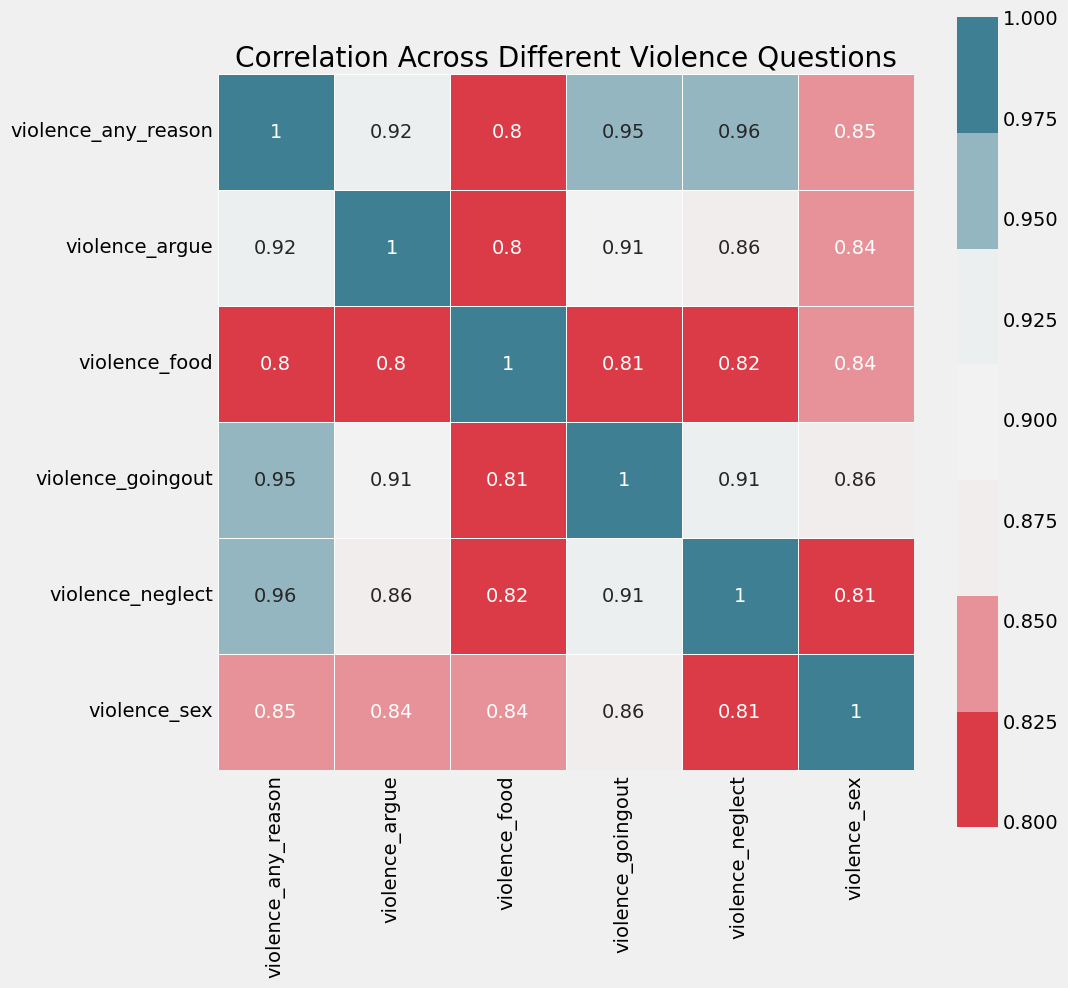

In [10]:
# Examine Correlations
plt.figure(figsize=(10,10))
sns.heatmap(survey_df.iloc[:,4:].corr(),
            square=True,
            linewidths=.5,
            cmap=sns.diverging_palette(10, 220, sep=80, n=7),
            annot=True,
           )
plt.title('Correlation Across Different Violence Questions')
plt.show()